This notebook is similar to plot_precipitation_ABM, except that it will work on a list of files.

In [1]:
import numpy as np
import pandas as pd
import os
import glob
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Create a list of files given the file directory and the file name pattern:

In [2]:
datadir = '../data/'
datafilelist = sorted(glob.glob(os.path.join(datadir, 'IDCJAC0009_*_2014_Data.csv')))
len(datafilelist)

6

# Data reading

There are 6 files in our data directory.<br>
We can read all of them and merge them based on the Year, Month, Day columns.<br>
To do so, we use the pandas [merge](http://pandas.pydata.org/pandas-docs/stable/merging.html) function.

In addition we change the column names using the station number column, as the column names are then used to set the legend in the plot.

In [4]:
df = pd.read_csv(datafilelist[0])
station_number = (df.loc[0, 'Bureau of Meteorology station number'])
df = df[['Year', 'Month', 'Day', 'Rainfall amount (millimetres)']]
df.columns = ['Year', 'Month', 'Day', "Station {0}".format(station_number)]

for datafile in datafilelist[1:]:
    print("Working on file {0}".format(datafile))
    # Data reading
    df2merge = pd.read_csv(datafile)
    # Get the station number from the corresponding column
    station_number = (df2merge.loc[0, 'Bureau of Meteorology station number'])
    # Take only interesting columns
    df2merge = df2merge[['Year', 'Month', 'Day', 'Rainfall amount (millimetres)']]
    # Modify the column name (useful for the plot later)
    df2merge.columns = ['Year', 'Month', 'Day', "Station {0}".format(station_number)]
    # Merge the column based on Year, Month, Day
    df = pd.merge(df, df2merge, on=['Year', 'Month', 'Day'])

Working on file ../data/IDCJAC0009_014610_2014_Data.csv
Working on file ../data/IDCJAC0009_015508_2014_Data.csv
Working on file ../data/IDCJAC0009_023012_2014_Data.csv
Working on file ../data/IDCJAC0009_044044_2014_Data.csv
Working on file ../data/IDCJAC0009_091019_2014_Data.csv


We get a new dataframe with 365 lines, as expected. Each line contains the data for each station.<br>
We derive the date from the Year, Month and Day columns, set the index to dates and then remove the Year, Month and Day columns.

In [5]:
dates = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.index = dates
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
df[:5]

,Station 5085,Station 14610,Station 15508,Station 23012,Station 44044,Station 91019
2014-01-01,38.0,0.0,0.0,0.0,0.0,0.0
2014-01-02,0.0,0.0,0.0,NaN,0.0,2.0
2014-01-03,0.0,0.0,0.0,NaN,0.0,0.0
2014-01-04,0.0,18.0,0.0,NaN,0.0,0.0
2014-01-05,0.0,0.0,0.0,NaN,0.0,0.0


# Plot

With the newly created data frame, we don't have to specify anything to the plot function, except some style options.

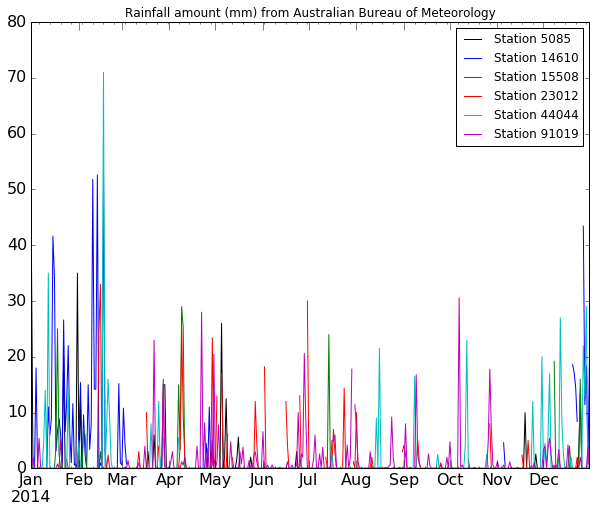

In [8]:
df.plot(fontsize=16, figsize=(10, 8),
             linewidth=1,
             title='Rainfall amount (mm) from Australian Bureau of Meteorology',
             legend=True
            )